# Global Stock Price

This report conducts a comprehensive analysis of a dataset containing global stock price information. The dataset includes data related to various stock indices, companies and their stock price details such as opening, highest lowest, closing prices, adjusting closing prices, and traded shares. This dataset is structured around key attributes, including company name, stock ticker symbols, currency and exchange markets.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

## Global Settings

In [2]:
# Seaborn settings/style
sns.set(style='whitegrid', palette='Set2')

# Dataset URL
ds_url = 'https://raw.githubusercontent.com/cogxen/datasets/main/global-stock-price/dataset.csv'

## Data Preprocessing

- Load the dataset
- Check dataset's data types
- Check for missing values and duplicates
- Drop missing values and duplicates
- Check for outliers

### Load the Dataset

- Display the first 20 rows of the dataset to understand its structure, the data, and to gain insights into the attributes.

In [3]:
ds = pd.read_csv(ds_url)
ds.head(20) 

,company_public,stock_ticker,yahoo_finance_ticker,currency,exchange,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,traded_shares,company
0,AEX-Index,^AEX,^AEX,EUR,AMS,730.65,731.91,721.29,724.18,724.18,43000,NaN
1,Austrian Traded Index in EUR,^ATX,^ATX,EUR,VIE,3170.08,3191.83,3118.64,3128.03,3128.03,3145900,NaN
2,S&P/ASX ALL AUSTRALIAN 50,^AXAF,^AXAF,AUD,ASX,7160.40,7160.40,7118.60,7129.60,7129.60,0,NaN
3,S&P/ASX ALL AUSTRALIAN 200,^AXAT,^AXAT,AUD,ASX,7046.60,7049.90,7013.10,7032.00,7032.00,483100,NaN
4,S&P/ASX 200 Cons Disc,^AXDJ,^AXDJ,AUD,ASX,3062.90,3068.40,3034.40,3035.20,3035.20,27580900,NaN
5,S&P/ASX 200 Financials,^AXFJ,^AXFJ,AUD,ASX,6304.10,6304.10,6251.30,6284.70,6284.70,35473700,NaN
6,S&P/ASX 200 Health Care,^AXHJ,^AXHJ,AUD,ASX,37455.90,37457.70,36953.30,36953.30,36953.30,7957900,NaN
7,S&P/ASX 200 Info Tech,^AXIJ,^AXIJ,AUD,ASX,1721.50,1729.80,1702.70,1719.10,1719.10,4630500,NaN
8,S&P/ASX 200,^AXJO,^AXJO,AUD,ASX,7048.60,7051.50,7014.90,7033.20,7033.20,484800,NaN
9,S&P/ASX 200 RESOURCES,^AXJR,^AXJR,AUD,ASX,5866.20,5898.30,5844.70,5892.20,5892.20,278907600,NaN


As you can see, the dataset contains the following columns:

- `company_public` - Company name
- `stock_ticker` - Stock ticker symbol
- `yahoo_finance_ticker` - Yahoo finance ticker symbol
- `currency` - Currency of the stock price
- `exchange` - Exchange market
- `opening_price` - Opening price of the stock
- `highest_price` - Highest price of the stock
- `lowest_price` - Lowest price of the stock
- `closing_price` - Closing price of the stock
- `adjusted_closing_price` - Adjusted closing price of the stock
- `traded_shares` - Number of shares traded
- `company` - Company name (same as `company_public`)

### Check Dataset's Data Types

- Check the data type of each column in the dataset to understand the attributes.

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45729 entries, 0 to 45728
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_public          45722 non-null  object 
 1   stock_ticker            45728 non-null  object 
 2   yahoo_finance_ticker    45729 non-null  object 
 3   currency                45722 non-null  object 
 4   exchange                45722 non-null  object 
 5   opening_price           45729 non-null  float64
 6   highest_price           45729 non-null  float64
 7   lowest_price            45729 non-null  float64
 8   closing_price           45729 non-null  float64
 9   adjusted_closing_price  45601 non-null  float64
 10  traded_shares           45729 non-null  int64  
 11  company                 2232 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 4.2+ MB


### Check for Missing Values and Duplicates

- Check for missing values in the dataset, and if any are found, drop them.
- Check for duplicates in the dataset, and if any are found, drop them.


In [5]:
ds.isnull().sum()

company_public                7
stock_ticker                  1
yahoo_finance_ticker          0
currency                      7
exchange                      7
opening_price                 0
highest_price                 0
lowest_price                  0
closing_price                 0
adjusted_closing_price      128
traded_shares                 0
company                   43497
dtype: int64

As you notice, there are missing values in the dataset. Let's drop them.

In [6]:
ds.dropna(inplace=True)

Let's display the new dataset after dropping the missing values. Let's display the first 20 rows of the dataset to understand its structure, the data, and to gain insights into the attributes.

In [7]:
ds.head(20)

,company_public,stock_ticker,yahoo_finance_ticker,currency,exchange,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,traded_shares,company
14893,Argo Blockchain,ARB,ARB.L,GBP,LSE,8.1250,8.6700,8.0000,8.6700,8.6700,1836825,Argo Blockchain
14895,Arbuthnot Banking Group,ARBB,ARBB.L,GBP,LSE,964.7000,964.7000,964.7000,965.0000,965.0000,1000,Argo Blockchain
14903,Arcontech Group,ARC,ARC.L,GBP,LSE,98.0000,98.9000,96.0000,97.5000,97.5000,4450,Argo Blockchain
14916,Arc Minerals,ARCM,ARCM.L,GBP,LSE,2.6250,2.6800,2.3000,2.6500,2.6500,7347334,Argo Blockchain
14946,Argos Resources,ARG,ARG.L,GBP,LSE,0.0035,0.0035,0.0035,0.0035,0.0035,0,Argo Blockchain
14955,Argo Group,ARGO,ARGO.L,GBP,LSE,7.0000,6.0000,6.0000,7.0000,7.0000,190,Argo Blockchain
14956,Argan,ARGP,ARGP.L,GBP,YHD,67.5000,67.5000,67.5000,67.5000,67.5000,0,Argo Blockchain
14980,Arix Bioscience,ARIX,ARIX.L,GBP,LSE,125.0000,126.4000,124.0000,124.0000,124.0000,35277,Argo Blockchain
15026,Aurora Investment Trust,ARR,ARR.L,GBP,LSE,208.0000,209.0000,206.0000,206.0000,206.0000,110468,Argo Blockchain
15036,Asiamet Resources,ARS,ARS.L,GBP,LSE,1.0750,1.0740,0.9500,0.9750,0.9750,8336636,Argo Blockchain


In [8]:
ds.duplicated().sum()

0

#### Check for Outliers

- First, let's describe the dataset to understand the distribution of the data.
- Then, we will check for outliers using box plots.

In [9]:
ds.describe()

,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,traded_shares
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2.209000e+03
mean,620.000477,623.212251,614.545396,630.056457,630.056457,1.900154e+06
std,3965.864118,3976.917599,3946.078163,3981.689347,3981.689347,1.429104e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5.430000,5.400000,5.333000,5.795000,5.795000,0.000000e+00
50%,29.020000,29.000000,28.900000,29.980000,29.980000,1.319600e+04
75%,131.000000,133.010000,130.000000,133.100000,133.100000,2.745920e+05
max,108625.000000,108662.000000,107917.000000,108648.000000,108648.000000,3.556711e+08


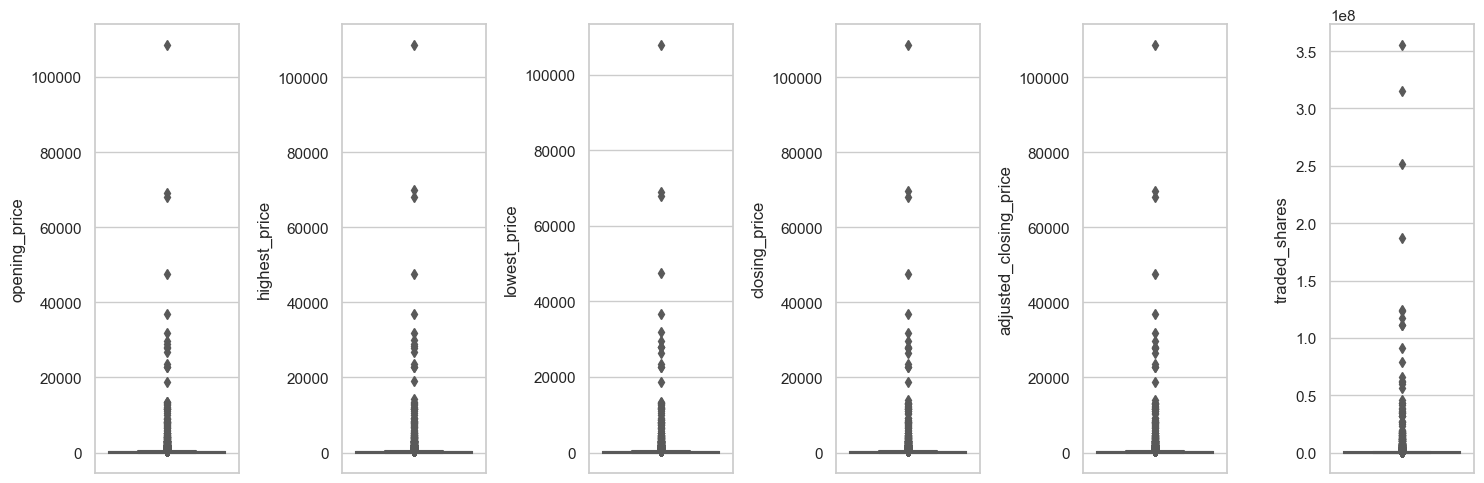

In [10]:
# Plot box plots for us to check for outliers
plt.figure(figsize=(15, 5))
plt.subplot(1, 6, 1)
sns.boxplot(y=ds['opening_price'])
plt.subplot(1, 6, 2)
sns.boxplot(y=ds['highest_price'])
plt.subplot(1, 6, 3)
sns.boxplot(y=ds['lowest_price'])
plt.subplot(1, 6, 4)
sns.boxplot(y=ds['closing_price'])
plt.subplot(1, 6, 5)
sns.boxplot(y=ds['adjusted_closing_price'])
plt.subplot(1, 6, 6)
sns.boxplot(y=ds['traded_shares'])

plt.tight_layout()
plt.show()

- It's interesting to note that the distribution of all price columns (`opening_price`, `highest_price`, `lowest_price`, `closing_price`, and `adjusted_closing_price`) are appear to be very similar. This suggests that the prices tend to move together throughout the day. 
- The wider the spread of traded shares on the right side of the boxplot suggests that there may have been some days with significantly higher trading volumes than usual.

##### Remove Outliers

In [11]:
Q1 = ds.quantile(0.25, numeric_only=True)
Q3 = ds.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Align the DataFrame and Series before performing the comparison
ds, lower_bound = ds.align(lower_bound, axis=1, copy=False)
ds, upper_bound = ds.align(upper_bound, axis=1, copy=False)

# Filter the DataFrame based on the lower and upper bounds
ds = ds[~((ds < lower_bound) | (ds > upper_bound)).any(axis=1)]

# Display the new dataset after removing outliers
ds.describe()

,adjusted_closing_price,closing_price,highest_price,lowest_price,opening_price,traded_shares
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,43.491036,43.491036,43.394895,42.425760,43.161385,74295.341748
std,60.775730,60.775730,61.489535,59.844083,60.974510,144526.113329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.930000,3.930000,3.450000,3.390000,3.450000,0.000000
50%,18.600000,18.600000,18.037900,17.920000,17.962000,3000.000000
75%,55.500000,55.500000,55.500000,53.400000,55.000000,63069.000000
max,315.000000,315.000000,320.000000,309.000000,312.000000,686055.000000


As you can see, the outliers have been removed from the dataset. The subsequent analysis will be based on this cleaned dataset.

## Descriptive Statistics

- Display summary statistics for numeric columns (`opening_price`, `highest_price`, `lowest_price`, `closing_price`, `adjusted_closing_price`, and `traded_shares`) in the dataset.
    - Mean
    - Median (50th Percentile)
    - Standard Deviation
    - Minimum
    - Maximum
    - 25th Percentile
    - 75th Percentile
    - Count

In [12]:
# Create a column list for descriptive statistics
numeric_columns = ['opening_price', 'highest_price', 'lowest_price', 'closing_price', 'adjusted_closing_price', 'traded_shares']

# Calculate descriptive statistics
summary_statistics = ds[numeric_columns].describe()

# Extract the required statistics and display them
summary_statistics = summary_statistics.loc[['mean', 'std', 'min', 'max', '50%', '25%', '75%', 'count']]
summary_statistics

,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,traded_shares
mean,43.161385,43.394895,42.425760,43.491036,43.491036,74295.341748
std,60.974510,61.489535,59.844083,60.775730,60.775730,144526.113329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,312.000000,320.000000,309.000000,315.000000,315.000000,686055.000000
50%,17.962000,18.037900,17.920000,18.600000,18.600000,3000.000000
25%,3.450000,3.450000,3.390000,3.930000,3.930000,0.000000
75%,55.000000,55.500000,53.400000,55.500000,55.500000,63069.000000
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000


## Objectives

For the primary analysis, we will focus on the following objectives:

- **Currency and Exchange Analysis**: Assess the distribution of stock prices by currency and exchange markets, examine the distribution of companies across various currency types and exchange markets, and determine the most prevalent currencies and exchange markets within the dataset.
- **Price Distribution Analysis**: Evaluate the distribution of stock prices, including opening, highest, lowest, closing, and adjusted closing prices, as well as the volume of traded shares.
- **Correlation Analysis**: Investigate the relationship between two variables which are `closing_price` or the stock price vs. `traded_shares` or the trading volumes.
- **Volume of Traded Shares**: Assess the trading volume for each company, highlight those with the highest and lowest volumes, and identify companies with the most notable fluctuations in trading volume.
- **Correlation Analysis**: Perform a correlation analysis to explore the relationships between opening and lowest prices, highest and closing prices, and adjusted closing prices.
- **Variability Analysis**: Measure the variability of stock prices by calculating the standard deviation for opening, highest, lowest, closing, and adjusted closing prices.
- **Company Analysis**: Evaluate the stock prices of individual companies, identify those with the highest and lowest prices, and determine which companies experience the most significant price changes.

### Currency and Exchange Analysis

- Explore the distribution of stock prices based on currency and exchange markets.
- Identify the most common currencies and exchange markets.

#### Currency Analysis

In [13]:
# Count the number of unique currencies in the dataset
currency_counts = ds['currency'].value_counts()
currency_counts

USD    588
GBP    425
EUR    333
CAD     90
AUD     36
INR     20
BRL     13
CHF      9
NZD      8
SEK      8
MXN      7
IDR      3
CNY      1
SGD      1
ISK      1
DKK      1
PLN      1
Name: currency, dtype: int64

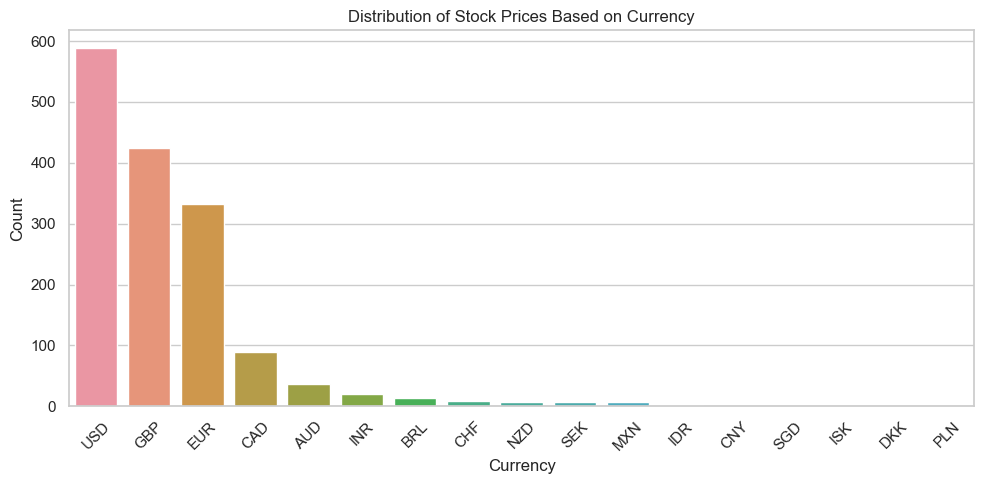

In [14]:
# Plot the distribution of stock prices based on currency
plt.figure(figsize=(10, 5))
sns.countplot(data=ds, x='currency', order=currency_counts.index)
plt.title('Distribution of Stock Prices Based on Currency')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph depicts a distribution of stock prices based on the currency they are traded in. It appears that the majority of the stock prices in the dataset are listed in `USD`. While `USD` is the dominant currency, in this graph, it also shows a presence of stocks listed in other currencies like `GBP`, `EUR`, `CAD` and several others. 

#### Exchange Analysis

In [15]:
# Count the number of unique exchange markets in the dataset
exchange_counts = ds['exchange'].value_counts()
exchange_counts

LSE    542
FRA    249
PNK    240
NYQ     69
TOR     66
NMS     60
NCM     40
ASX     36
NGM     35
PCX     29
NSI     18
GER     17
EBS     16
VAN     16
YHD     13
SAO     13
PAR     10
MIL      9
NZE      8
HEL      8
STO      8
BTS      8
ASE      6
MEX      6
CNQ      6
AMS      5
VIE      4
JKT      3
MCE      1
ICE      1
CPH      1
BRU      1
WSE      1
Name: exchange, dtype: int64

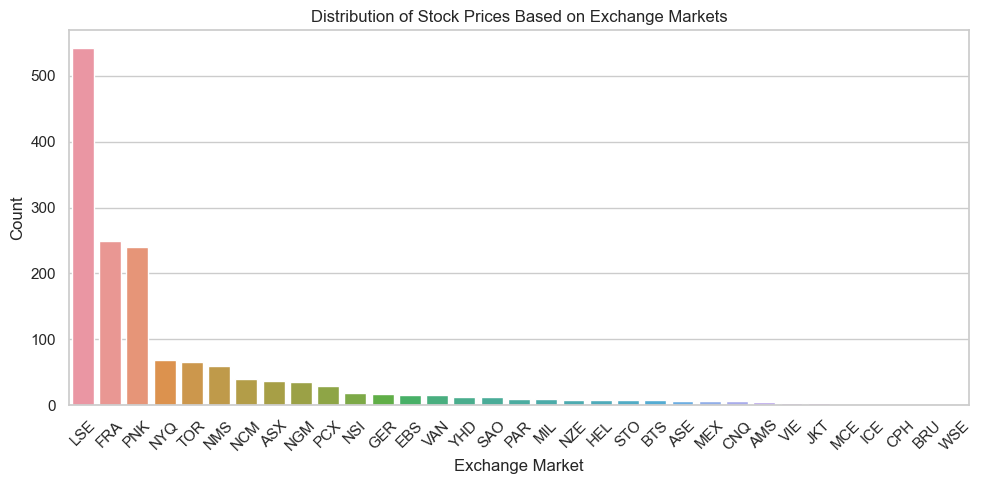

In [16]:
# Plot the distribution of stock prices based on exchange markets
plt.figure(figsize=(10, 5))
sns.countplot(data=ds, x='exchange', order=exchange_counts.index)
plt.title('Distribution of Stock Prices Based on Exchange Markets')
plt.xlabel('Exchange Market')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph depicts a distribution of stock prices across various exchange markets. The information suggests that the majority of the stock prices in this dataset are listed on the `LSE`. While `LSE` is the dominant exchange market, the graph also shows a presence of stock prices listed on other exchanges such as `FRA`, `PNK`, `NYQ` and several others.

### Price Distribution Analysis

- Evaluate the distribution of stock prices, including opening, highest, lowest, closing, and adjusted closing prices, as well as the volume of traded shares.

#### Opening Price Distribution

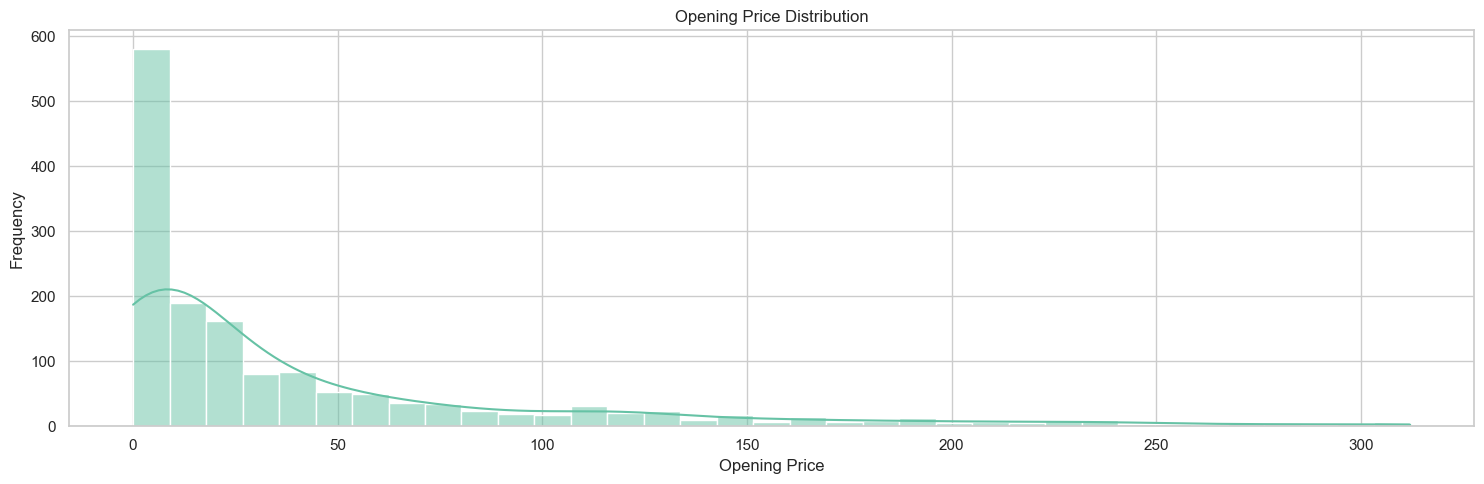

In [17]:
# Plot the distribution of opening prices
plt.figure(figsize=(15, 5))
sns.histplot(ds['opening_price'], kde=True)
plt.title('Opening Price Distribution')
plt.xlabel('Opening Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The opening price distribution is right-skewed, with the majority of opening prices falling between 50 and 300. This analysis provides insights into the distribution of opening prices.

#### Highest Price Distribution

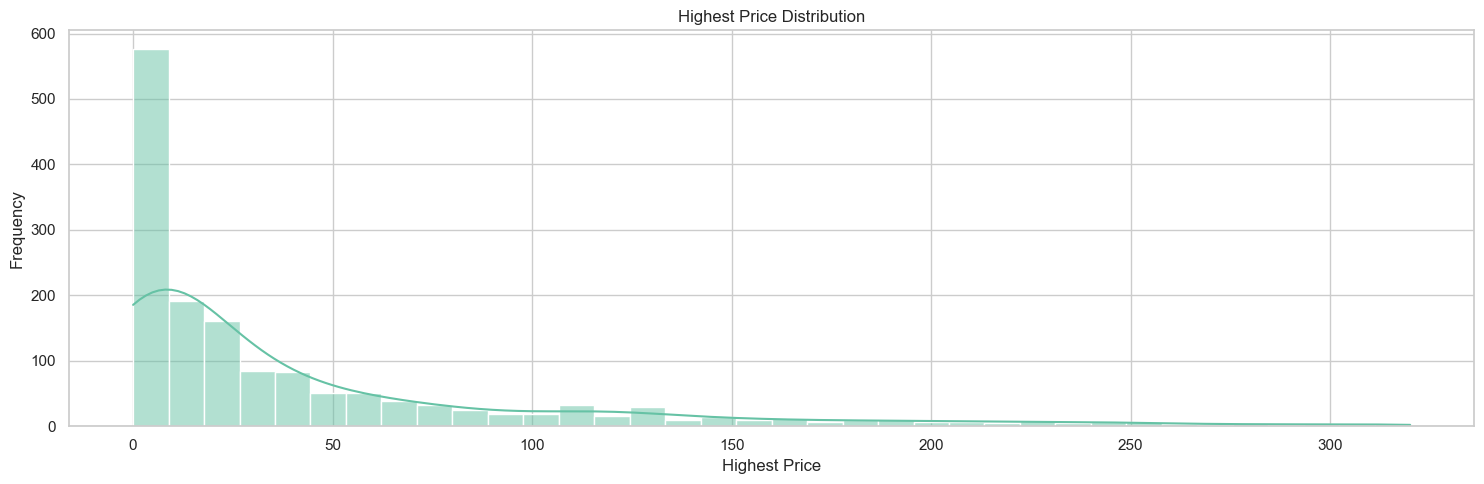

In [18]:
# Plot the distribution of highest prices
plt.figure(figsize=(15, 5))
sns.histplot(ds['highest_price'], kde=True)
plt.title('Highest Price Distribution')
plt.xlabel('Highest Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The highest price distribution is right-skewed, with the majority of highest prices falling between 50 and 300. This analysis provides insights into the distribution of highest prices.

#### Lowest Price Distribution

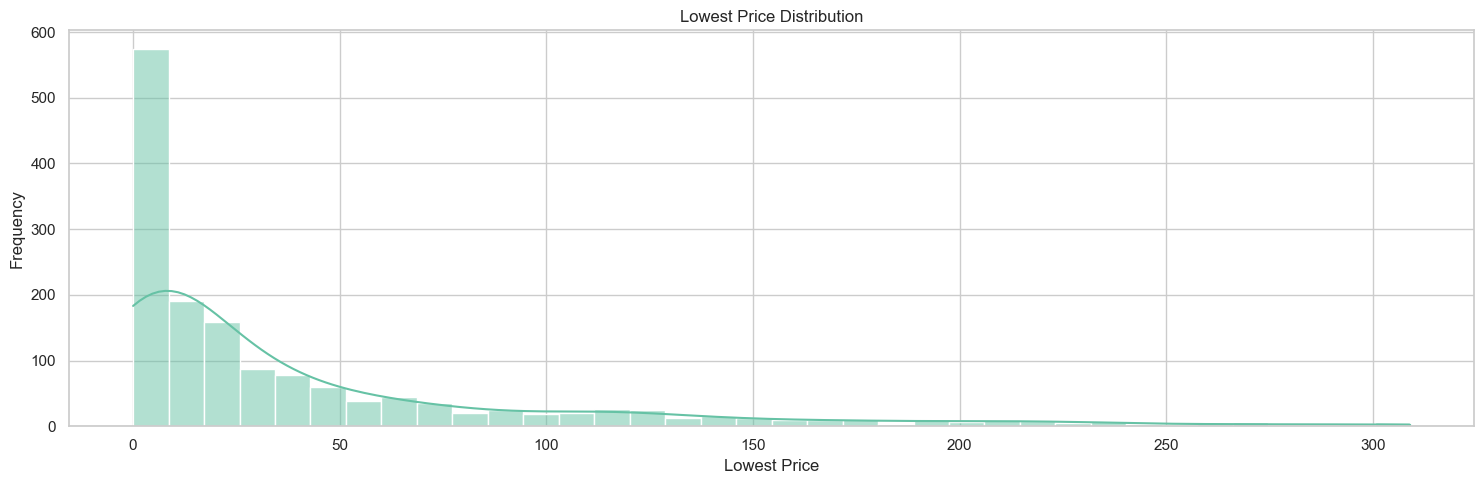

In [19]:
# Plot the distribution of lowest prices
plt.figure(figsize=(15, 5))
sns.histplot(ds['lowest_price'], kde=True)
plt.title('Lowest Price Distribution')
plt.xlabel('Lowest Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The lowest price distribution is right-skewed, with the majority of lowest prices falling between 50 and 300. This analysis provides insights into the distribution of lowest prices.

#### Closing Price Distribution

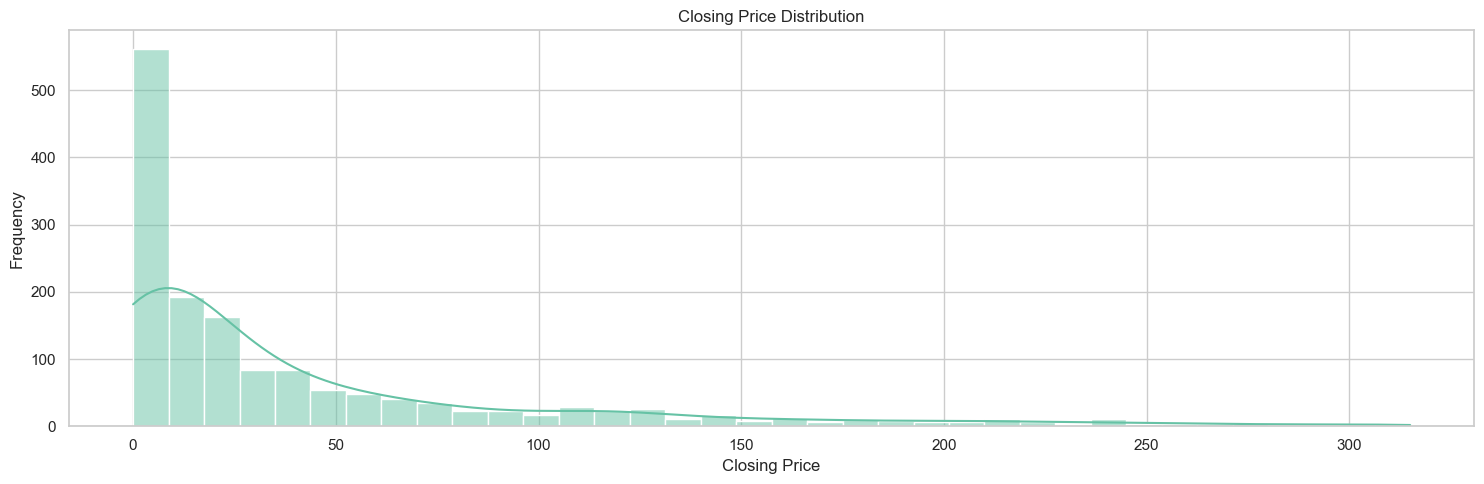

In [20]:
# Plot the distribution of closing prices
plt.figure(figsize=(15, 5))
sns.histplot(ds['closing_price'], kde=True)
plt.title('Closing Price Distribution')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The closing price distribution is right-skewed, with the majority of closing prices falling between 50 and 300. This analysis provides insights into the distribution of closing prices.

#### Adjusted Closing Price Distribution

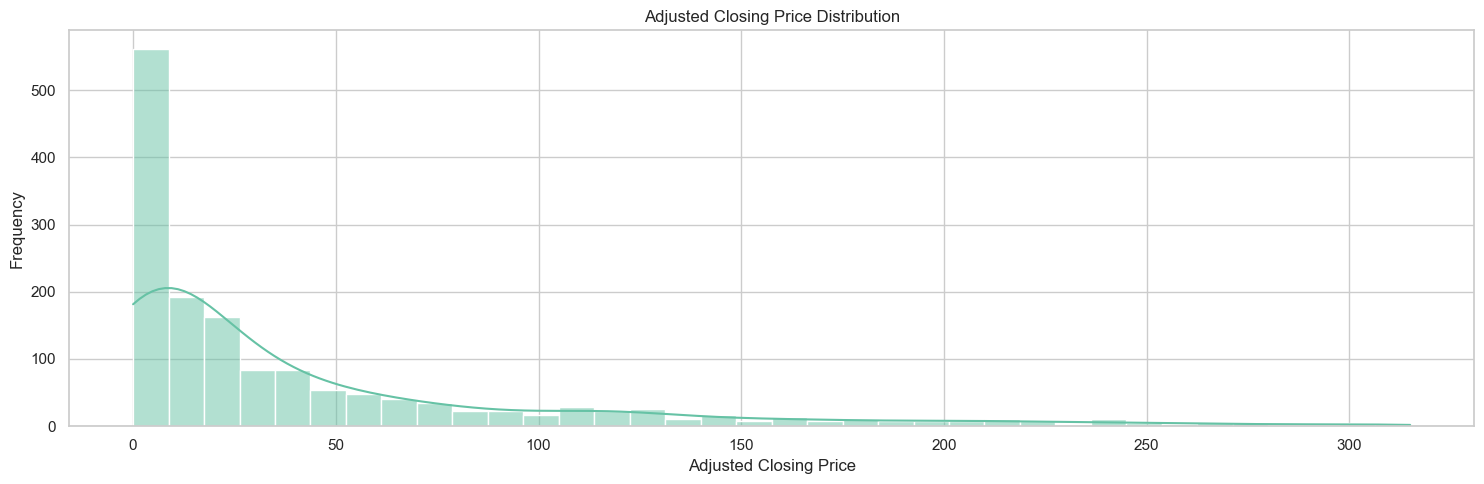

In [21]:
# Plot the distribution of adjusted closing prices
plt.figure(figsize=(15, 5))
sns.histplot(ds['adjusted_closing_price'], kde=True)
plt.title('Adjusted Closing Price Distribution')
plt.xlabel('Adjusted Closing Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The adjusted closing price distribution is right-skewed, with the majority of adjusted closing prices falling between 50 and 300. This analysis provides insights into the distribution of adjusted closing prices.

#### Traded Shares Distribution

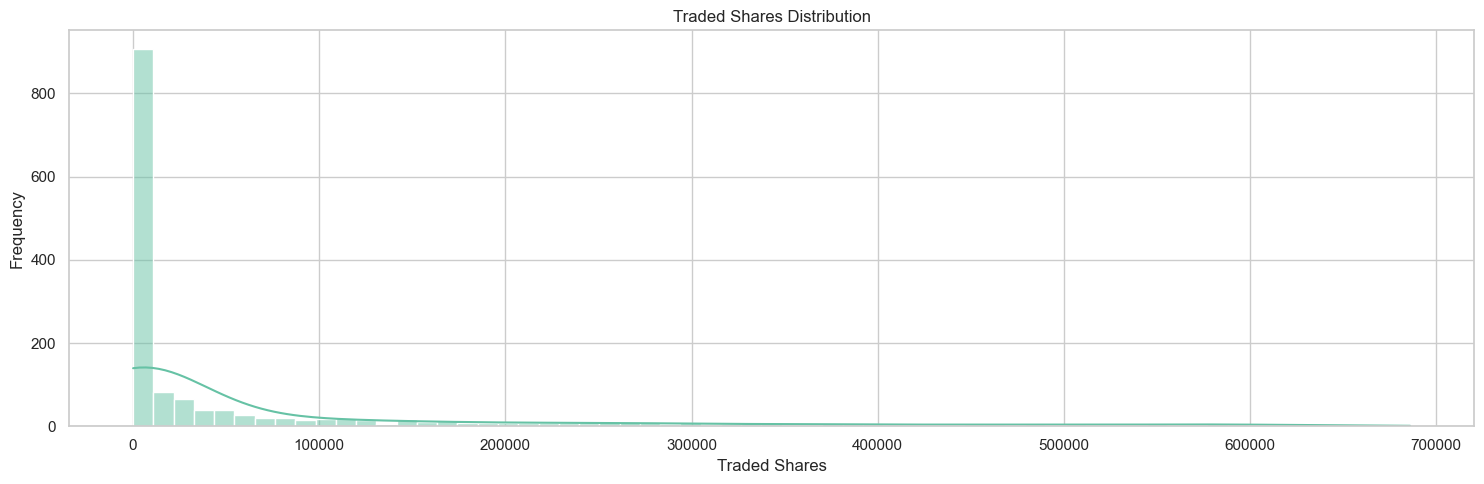

In [22]:
# Plot the distribution of traded shares
plt.figure(figsize=(15, 5))
sns.histplot(ds['traded_shares'], kde=True)
plt.title('Traded Shares Distribution')
plt.xlabel('Traded Shares')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The traded shares distribution is right-skewed, with the majority of traded shares falling between 0 and 100000. This analysis provides insights into the distribution of traded shares.

### Correlation Analysis

- We will investigate the relationship between two variables which are stock price vs trading volumes so we can understand the correlation between them. In this case, we will examine the connection or correlation between a stock's closing price and the number of shares traded.
- This will provide us insights into how the closing price of a stock might fluctuate with vary trading volumes. By examining the correlation between these two variables, we can determine the following:
    - **Presence or Absence of Correlation**: A scattered distribution of points suggests a week or no correlation. In other words, high trading volumes doesn't necessarily imply a high (or low) closing price, and vice versa.
    - **Trading Volume and Price Volatility**: A wider spread of closing prices at higher trading volumes might indicate increased volatility in the stock's price on those days.
    - **Outliers**: These are the datapoints far from the main cluster could represent unusual events impacting the stock price, warranting further investigation. 

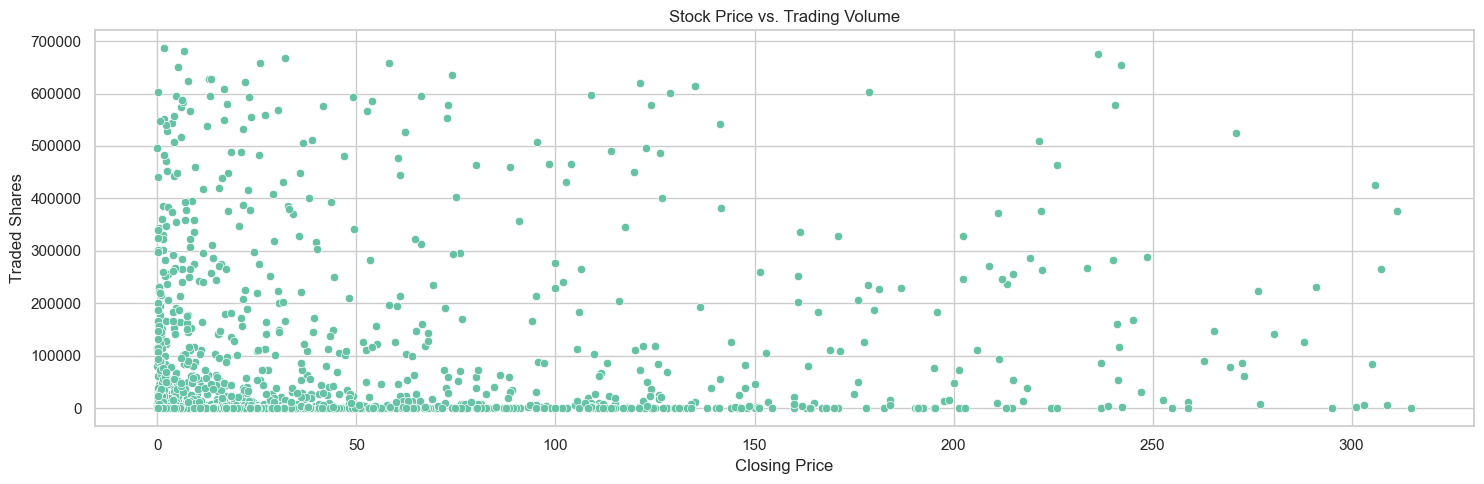

In [23]:
# Plot the stock price vs trading volumes
plt.figure(figsize=(15, 5))
sns.scatterplot(data=ds, x='closing_price', y='traded_shares')
plt.title('Stock Price vs. Trading Volume')
plt.xlabel('Closing Price')
plt.ylabel('Traded Shares')
plt.tight_layout()
plt.show()

As you can see, there is no clear linear correlation between the closing price and the number of shares traded. This means, there's not a strong positive or negative relationship between the two variables. In other words, on the days with high trading volumes, the closing price could be high or low, and vice versa. 

Here are some additional observations that can be made from this scatter plot:
- There is wider range of closing prices at higher trading volumes. This suggests that there is more volatility in the stock price on days with higher trading volumes.
- There are a few data points that fall far away from the main cluster of points. There outliers could represent days when there were unusual events that affects the stock price, such as a news announcements or a change in the company's financial performance. 

### Volume of Traded Shares

- We will analyze the volume of shares traded for each company in the dataset. We'll aim to understand the distribution of trading volume across companies and identify those with noteworthy volumes characteristics. Here's what we'll do:
    - **Descriptive Statistics**: We'll calculate the various descriptive statistics, that we've already calculated above, for the traded shares' column.
    - **Identifying Volume Extremes**: We'll identify companies with the highest and lowest average traded volumes. This will help us to understand which companies have consistently high or low trading activities. 
    - **Volume Fluctuations**: We'll calculate the coefficient of variation (CV) for traded shares to identify companies with the most significant fluctuations in trading volume. This will represent the standard deviation divided by the mean, indicating the relative variability compared to the average volume. Companies with higher CVs will exhibit more significant fluctuations in their daily traded volume. 

#### Descriptive Statistics

NOTE: This information has already been calculated above. Let's display it again.

In [24]:
summary_statistics

,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,traded_shares
mean,43.161385,43.394895,42.425760,43.491036,43.491036,74295.341748
std,60.974510,61.489535,59.844083,60.775730,60.775730,144526.113329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,312.000000,320.000000,309.000000,315.000000,315.000000,686055.000000
50%,17.962000,18.037900,17.920000,18.600000,18.600000,3000.000000
25%,3.450000,3.450000,3.390000,3.930000,3.930000,0.000000
75%,55.000000,55.500000,53.400000,55.500000,55.500000,63069.000000
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000


#### Identifying Volume Extremes

- Identify companies with the highest and lowest average traded volumes.

In [25]:
# Sort by the highest traded shares
highest_volume = ds.nlargest(10, 'traded_shares')

# Sort by the lowest traded shares
lowest_volume = ds.nsmallest(10, 'traded_shares')

In [26]:
# Display the companies with the highest traded shares
highest_volume[['company_public', 'traded_shares']]

,company_public,traded_shares
41585,Crimson Tide,686055
36250,Proteome Sciences,681188
43912,"Verisk Analytics,",676208
43964,Vista Outdoor,668622
44482,Worldline,658152
44055,Vanguard Emerging Markets Government Bond Inde...,658026
38202,RWS Holdings,654429
21970,Eden Research,651504
28594,ITM Power,635667
43201,"Utz Brands,",627172


In [27]:
# Display the companies with the lowest traded shares
lowest_volume[['company_public', 'traded_shares']]

,company_public,traded_shares
14946,Argos Resources,0
14956,Argan,0
15054,Alpha Real Trust,0
15237,Aseana Properties,0
15425,Athelney Trust,0
15503,Autins Group,0
15594,Advanced Oncotherapy,0
15665,UBS (Irl) ETF plc - MSCI ACWI Socially Respons...,0
15686,Axis Bank,0
15700,Axiom European Financial Debt Fund,0


#### Volume Fluctuations

- Calculate the coefficient of variation (CV) for traded shares to identify companies with the most significant fluctuations in trading volume.

In [28]:
# Calculate the coefficient of variation for traded shares
ds['volume_cv'] = ds['traded_shares'].std() / ds['traded_shares'].mean()

# Sort by the highest coefficient of variation
highest_cv = ds.nlargest(10, 'volume_cv')

# Display the companies with the highest coefficient of variation
highest_cv[['company_public', 'volume_cv']]

,company_public,volume_cv
14903,Arcontech Group,1.945292
14946,Argos Resources,1.945292
14955,Argo Group,1.945292
14956,Argan,1.945292
14980,Arix Bioscience,1.945292
15026,Aurora Investment Trust,1.945292
15054,Alpha Real Trust,1.945292
15099,ASA International Group,1.945292
15119,abrdn Smaller Companies Income Trust,1.945292
15129,SPDR S&P Pan Asia Dividend Aristocrats UCITS ETF,1.945292


The companies listed in this table likely have significant fluctuations in their daily trading volumes. This means that the daily volume of shares traded for these companies can deviate considerably from their average daily volume. By examining the the companies with the highest CVs, we can potentially identify stock that are:
- **More volatile**: Companies' stock prices might experience larger swings due to higher trading volumes fluctuations.
- **Subject to more news or event-driven trading activity**: Sudden increase or drops in trading volume could be due to company-specific news or industry events.
- **Less liquid**: Companies with lower average trading volumes (and potentially high CVs) might be less liquid, meaning it might be harder to buy or sell their shares quickly.

### Variability Analysis

- we aim to measure the variability of stock prices for each company in the dataset. By calculating the standard deviation of various price points, we can gain insights into the fluctuations and volatility of stock prices.
    - **Descriptive Statistics**: We will calculate the standard deviation for the following price points for each company.
    - **Identifying Price Extremes**: We'll identify companies with the highest and lowest standard deviations for each price point. This will highlight companies with the most and least volatile stock prices.
    - **Comparing Volatility**: We will compare the standard deviations across different price points to see which aspect of the stock prices (opening, highest, lowest, closing, or adjusted closing) tends to exhibit the most variability.

#### Descriptive Statistics

- Calculate the standard deviation for opening, highest, lowest, closing, and adjusted closing prices.

In [29]:
# Calculating standard deviation for price points
price_points = ['opening_price', 'highest_price', 'lowest_price', 'closing_price', 'adjusted_closing_price']
std_dev = ds.groupby('company')[price_points].std()

# Display the standard deviation for each price point
std_dev

,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price
company,,,,,
11880 Solutions,0.028284,0.028284,0.028284,0.028284,0.028284
1867 Western Financial,NaN,NaN,NaN,NaN,NaN
1Spatial,NaN,NaN,NaN,NaN,NaN
ACI Worldwide,NaN,NaN,NaN,NaN,NaN
Accuray,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
va-Q-tec,NaN,NaN,NaN,NaN,NaN
voxeljet,NaN,NaN,NaN,NaN,NaN
zvelo,NaN,NaN,NaN,NaN,NaN


This report calculates the standard deviation for opening, highest, lowest, closing, and adjusted closing prices for various companies. However, for some companies, the standard deviation for highest price and lowest price is `NaN`. This is likely because the highest and lowest prices are the same for all the days in the dataset, resulting in a standard deviation of `0`. This could be due to a few reasons:
- **Missing Data**: There might be missing data for the highest and lowest prices. If a company doesn't have data for specific day, the standard deviation cannot be calculated.
- **Constant Prices**: The standard deviation is a measure of how spread out the data is from the mean. If all the highest prices and all the lowest prices for a particular company are the same, there is no deviation and hence the standard deviation will be zero. This could happen if the data represents opening prices on the same day for all companies.

#### Identifying Price Extremes

- Identify companies with the highest and lowest standard deviations for each price point.

In [30]:
# Identifying companies with highest and lowest standard deviations for each price point
max_std = std_dev.idxmax()
min_std = std_dev.idxmin()

In [31]:
# Display companies with the highest standard deviations for each price point
max_std

opening_price             Volex
highest_price             Volex
lowest_price              Volex
closing_price             Volex
adjusted_closing_price    Volex
dtype: object

In [32]:
# Display companies with the lowest standard deviations for each price point
min_std

opening_price                      Whirlpool
highest_price                      Whirlpool
lowest_price              Wereldhave Belgium
closing_price                        WashTec
adjusted_closing_price               WashTec
dtype: object

Companies with a high standard deviation for a particular price point have a larger spread of prices compared to the average price for that point in time. This could indicate that the stock price for these companies fluctuates more compared to other companies. On the other hand, companies with a low standard deviation have stock prices that are more stable and less volatile.

#### Comparing Volatility

- Compare the standard deviations across different price points to see which aspect of the stock prices (opening, highest, lowest, closing, or adjusted closing) tends to exhibit the most variability.

In [33]:
# Calculate the average standard deviation for each price point
avg_std = std_dev.mean()

In [34]:
# Display the average standard deviation for each price point
avg_std

opening_price             27.292355
highest_price             27.454968
lowest_price              26.971759
closing_price             26.764079
adjusted_closing_price    26.764079
dtype: float64

The average standard deviation is highest for the opening price which is 27.29 and the lowest for the adjusted closing price is 26.76. This suggests that the opening prices tend to fluctuate the most compared to the other price points. 

Possible reasons for this could be:
1. News and events happening overnight can affect stock prices when the market opens, leading to higher variability in opening prices compared to closing prices. 
2. Investors placing orders before the market opens can cause more significant price movements at the opening.

### Company Analysis

- Evaluate the stock prices of individual companies, identify those with the highest and lowest prices, and determine which companies experience the most significant price changes.
    - **Highest and Lowest Prices**: Identify companies with the highest and lowest average prices across different price points.
    - **Price Fluctuations**: Calculate the coefficient of variation (CV) for each company's stock prices to identify companies with the most significant fluctuations in prices. This will help us understand which companies experience the most significant price changes.

#### Highest and Lowest Prices

- Identify companies with the highest and lowest average prices across different price points.

In [35]:
# Identify companies with the highest and lowest average prices
highest_prices = ds.groupby('company')['closing_price'].mean().idxmax()
lowest_prices = ds.groupby('company')['closing_price'].mean().idxmin()

In [36]:
# Display companies with the highest average prices
highest_prices

'Faron Pharmaceuticals Oy'

In [37]:
# Display companies with the lowest average prices
lowest_prices

'Mangazeya Mining'

#### Price Fluctuations

- Calculate the coefficient of variation (CV) for each company's stock prices to identify companies with the most significant fluctuations in prices.

In [38]:
# Calculate the average prices for each company
avg_prices = ds.groupby('company')['closing_price'].mean()

# Calculate the coefficient of variation (CV) for each company's stock prices
std_prices = ds.groupby('company')['closing_price'].std()
cv = std_prices / avg_prices

In [39]:
# Display the companies with the highest coefficient of variation
highest_fluctuation = cv.idxmax()
highest_fluctuation

'Vuzix'

In [40]:
# Display the companies with the lowest coefficient of variation
lowest_fluctuation = cv.idxmin()
lowest_fluctuation

'WashTec'